# Logistic Regression Example with Scikit-Learn

Logistic Regression is a supervised predictive analysis technique and is used to predict the probability of a categorical dependent variable (with 2 values, usually 0 or 1) with some other continous independent variable(s). Another way to think of it is that it predicts $P(y=1)$ as a function of x.

#### Hypothesis Representation
The hypothesis representation of this Logistic Regression - i.e., what function we use to represent what we want to happen when we tackle a classification problem - needs to to produce a value between 0 and 1 
$$ 0 \leq h(x) \leq 1 $$

Remind you of any functions we have looked at today? The Sigmoid Function - sometimes known as the Logistic function satisfies this requirement. 

$$\frac{1}{1 + e^{-z}}$$

In the values $z$ can be a set of parameters and weights that we are using to fit the data. 
The function can assign input data to a class based on the probability that the function returns, e.g.,

$$h(x)\geq 0.5 \rightarrow y=1$$
$$h(x)< 0.5 \rightarrow y=0$$

In the Sigmoid function, $\phi(z) \geq 0.5$ when $z>0$, and as $z \rightarrow \infty$ then $\phi(z) \rightarrow 1$ and when $z \rightarrow -\infty$ then $\phi(z) \rightarrow 0$. The __decision boundary__ is the line that separates the area where y = 0 and where y = 1 and is produced by the hypothesis function given the training data, the same way you drew lines to separate the data at the end of the last notebook. 


#### Cost Function
The way that the approach works is that a set of paramaters and weights are initially used, these are used to estimate which classes each of the values in the training set belongs to. It then assesses how accurate the model is, using a __cost function__ that essentially measures how well the model predicts the values against the training set. Small changes are made to the parameters and weights depending on what the asessment produces and the algorithm repeats until the cost function is minimised. 

The cost function is the sum of the Cost for all of our training set data points $m$.

$$J(\phi)=-\frac{1}{m}$$ $$\sum\limits_{i=1}$$ $$\text{Cost}(h(x^i), y^i)$$

The cost function has at its heart 2 conditional cases:

$$\text{Cost}(h(x), y)  = (y log(h(x)) + (1-y)log(1-h(x))$$

So for each training data point we assess if the prediction $h(x)$ is the same as the labelled data $y$.
The key thing to observe here is that when $y=1$ the second term $=0$ and does not add to the cost. When $y=0$ the first term $=0$. So if the prediction $h(x)=1$ is correct then the cost for that point is $log(1)\rightarrow0$. If it missclassifies it as $y=1$ then the cost is $log(0)\rightarrow\infty$ - it penalises incorrect values but adds no cost for correct ones. 


#### Getting Started
However, we dont need to worry too much about the maths today. Someone has already done all the hard work and produced an API that allows us to feed in our data and fit a Logistic Regression model to it. Its part of [SciKit-Learn](http://scikit-learn.org/stable/) - along with many other useful machine learning functions. 

This makes performing logistic regression very straightformward - lets get going!

Start by importing the required modules, including our own little helper module ```scikit_utilities``` and the LogisticRegression model from ```sklearn```. From there we will follow the first few steps in the usual supervised learning system:

1. Load and prepare data
2. Train the model 
3. Evaluate the model
4. Adjust the model as required

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scikit_utilities as ut

from sklearn.linear_model import LogisticRegression

## Get the Iris Data - Split it and Standardise it
Use the helper module - remember this gets the data, classes are mapped to integers, splits it into train and test and also standardises it. 

In [2]:
X_train_std, y_train, X_test_std, y_test, X_combined_std, y_combined, X_train, X_test = ut.get_iris_data()

[0 1 2]
Training Data set is 105 values long


## Perform Logistic regression
Use the SciKit Learn [Logistic Regression classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit the standardised training data ```X_train_std```. Its a supervised model, so it needs the ```y_train``` dataset too!

Dont worry too much about the ```C``` and ```random_state``` parameters for now - just use the values below. 

In [3]:
lr = LogisticRegression(C=1000.0, random_state =0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

And that is it! You have __fitted the Logistic Regression model to the data!__

We can dig into the model and get various bit of information. We can see the coefficient weights it has used and what classes it has. This is useful to know if we study the algorithm in more depth in the future.

In [4]:
print("The model coefficents: ")
print(lr.coef_)
print("The model has fitted to the following classes: ")
print(lr.classes_)

The model coefficents: 
[[-7.34015187 -6.64685581]
 [ 2.54373335 -2.3421979 ]
 [ 9.46617627  6.44380858]]
The model has fitted to the following classes: 
[0 1 2]


## Evaluate the Model
#### Predict class memebership probability
We can use the model ```predict_proba``` method to predict the probability of data. Lets take the first 2 X_test_std data row and make a predictions on them:

In [5]:
X_test_std[0:2,:]

array([[ 0.70793846,  1.50872803],
       [ 0.09545238, -0.29145882]])

In [6]:
lr.predict_proba(X_test_std[0:2,:])

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01],
       [  6.08753106e-04,   9.99285569e-01,   1.05678028e-04]])

This says that the model predicts the first X data row belongs to class 0 (iris- setosa) with a P=2e-11, class 1 (iris-versicolor) with a probability of P=0.06 and class 2 (iris-virginica) with a probability of 0.94. 
##### What probabilities does it predict for the second data point?

### Predicting the class 
if we use a __One v All__ approach, we compare each prediction for the input data and take the best probability and assign it to that class. 
##### What class would you assign to the data points above?

We can also look at what the model predicts for all of the test set:

In [7]:
predictions = lr.predict(X_test_std)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0])

and compare it against the labelled data

In [8]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0])

As you can see the model is pretty accurate! But there are some misclassifications. But how do we measure this?

### Estimating accuracy with a score
We can score how accurate the model is by using the LinearRegression ```score``` method. This is done by supplying the method with the __standardised X test data and the y test__ data sets. This assesses how many of the test data points the model predicted correctly and indicates accuracy.

$$\text{fraction of correct predictions:} \frac{\text{correct predictions}}{\text{total number of data points}} $$

In [9]:
print("The model has an accuracy of %.1f%%" % (lr.score(X_test_std, y_test)*100))

The model has an accuracy of 97.8%


#### Plot Decision Regions and Visualise the Model
We can plot the data on a 2D plot as we did in the last notebook, only this time add the decision regions and boundaries that the model has learnt. This gives us a way of visually seeing where the model has decided to make the cut off between each Iris type. Is it close to where you would have drawn your regions?

In [10]:
# Will allow us to embed images in the notebook
%matplotlib inline
%pylab inline
#Sets the figure size
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


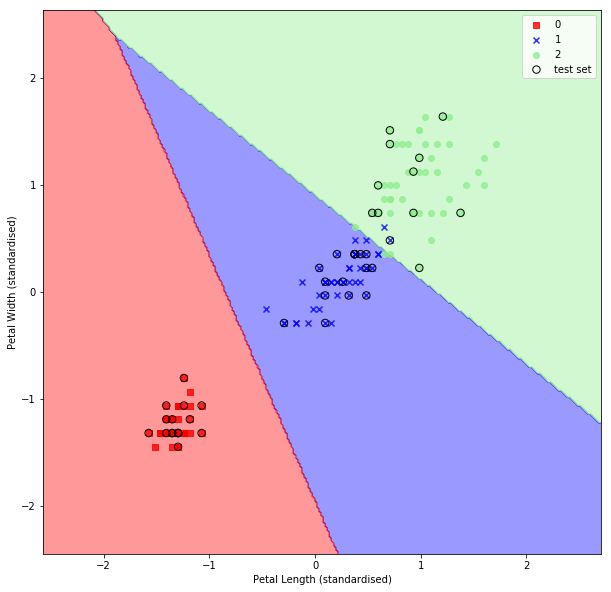

In [11]:
plt = ut.plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx=range(105, 150))
plt.xlabel('Petal Length (standardised)')
plt.ylabel('Petal Width (standardised)')
plt.legend(loc='upper right')
plt.show()

### EXTRA - Adding Regularisation

Overfitting is a common problem in Machine Learning, where a model fits a training set very well but fails to generalise to new data. When a model __OVERFITS__ we say it has __HIGH VARIANCE__.
This is often caused by an overly complicated model for the underlying data. 
Simialrly we can have models that __UNDERFIT__ (these models have __HIGH BIAS__) which means the model is not complex enough to capture the pattern in the underlying data. 

We often seek to get a good __BIAS-VARIANCE__ tradeoff for ML models, tuning the complexity of the models to capture the optimum ammount of underlying pattern. A method often used for this is __regularisation__. Regularisation is used to handle high correlation between features, filter out noise and prevent overfitting. It introduces extra information or bias to penalise extreme parameter weights. __L2__ regularisation is often used. It is added as a term to the __cost function__. It allows control on how well the model fits the training data by keeping the weights small. In the Logistic regression model we are using, this regularisation parameter is controlled by the value of C.

Lets fit 10 Logistic Regression models with different Inverse regularisation parameter values C (class 2 v all for illustration)

In [12]:
weights, params, accuracy = [], [], []
for c in np.arange(-5.0,5.0):
    lr = LogisticRegression(C=10**c, random_state =0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    accuracy.append(lr.score(X_test_std, y_test))

In [13]:
weights = np.array(weights)

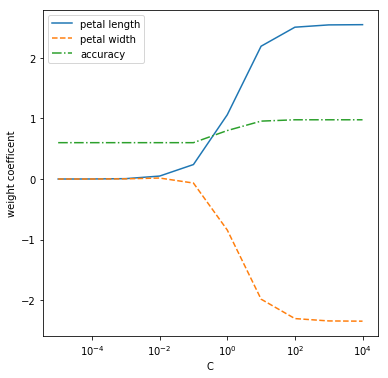

In [14]:
pylab.rcParams['figure.figsize'] = (6, 6)
plt.plot(params, weights[:,0],label='petal length')
plt.plot(params, weights[:,1],linestyle='--', label='petal width')
plt.plot(params, accuracy,linestyle='-.', label='accuracy')
plt.ylabel('weight coefficent')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

Increasing the Regularisation strength (decreasing C) the weight coefficents shrink. Lets see what that does to the model:

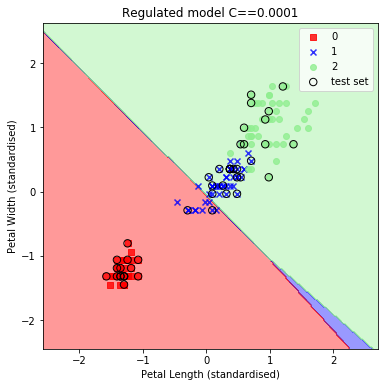

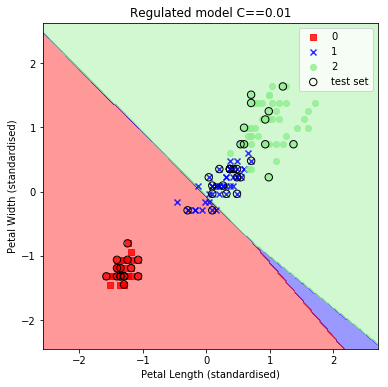

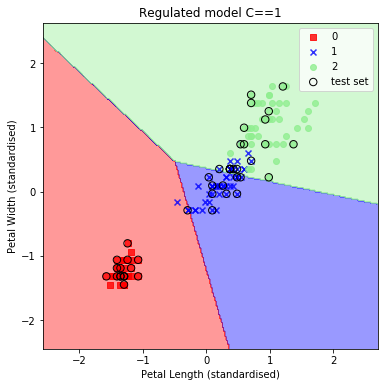

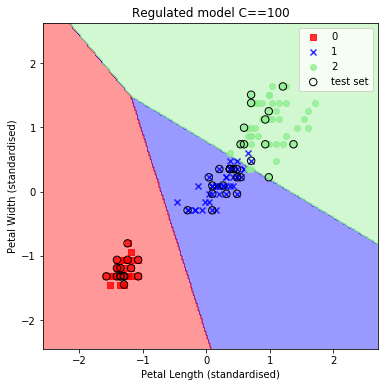

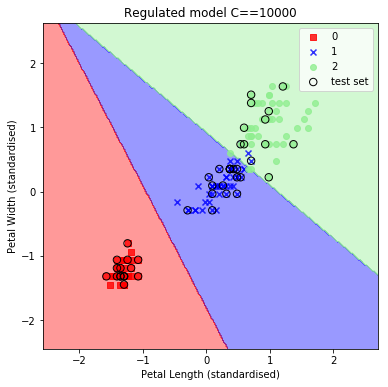

In [15]:
pylab.rcParams['figure.figsize'] = (6, 6)
C = [10**-4.0, 10**-2.0, 1,10**2, 10**4]
for c in C:
    lr = LogisticRegression(C=c, random_state =0)
    lr.fit(X_train_std, y_train)
    plt = ut.plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx=range(105, 150))
    plt.xlabel('Petal Length (standardised)')
    plt.ylabel('Petal Width (standardised)')
    plt.legend(loc='upper right')
    plt.title('Regulated model C==' + str(c))
    plt.show()

We often need to investigate the affects of things like regularisation to deveop a model that fits and generalises to the data the best way for a particular problem. 